# `DSML_WS_12` - Clustering

Please work on the following task **before** the twelfth workshop session.

## 1. Using tree-based methods to predict electricity demand

In last week's workshop, we talked about decision trees and ensemble methods and applied them to classify breast cancer cells. Let us see how this works in a regression setting, using our electricity demand dataset.

- Load data, define your X feature vector to include `Avg_temp` and `is_weekday` (which you first have to generate) and your Y vector to be `AVG`.
- Perform a train/test split.
- Train four different trees using `DecisionTreeRegressor`, with tree_depths ranging from 2 to 5.
- Train a gradient boosting model using `XGBRegressor` (you might have to read up on hyperparameters in the documentation).
- Train a random forest model using `RandomForestRegressor` (again, you might need to consult the documentation).
- Compare model performance using appropriate test metrics. Which model performs best?

Decision Tree MSE (depth 2): 0.02136936182819049


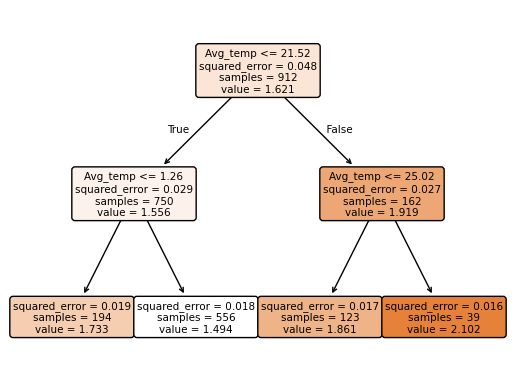

Decision Tree MSE (depth 3): 0.01596300115834919


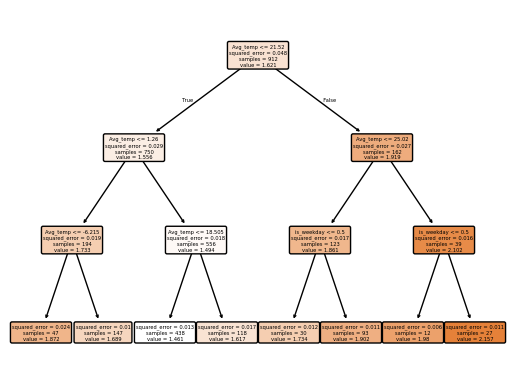

Decision Tree MSE (depth 4): 0.011806207766759579


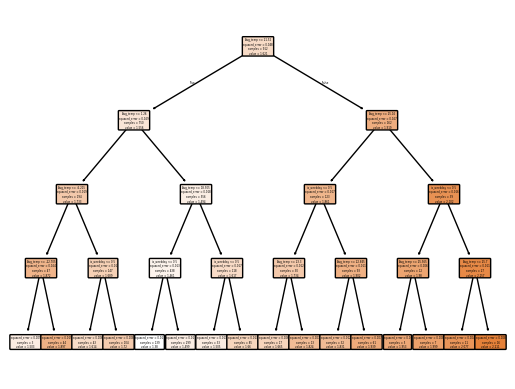

Decision Tree MSE (depth 5): 0.010035858222345638


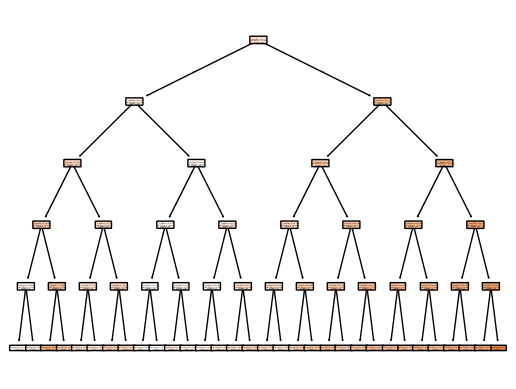

XGBoost MSE: 0.008533863998469006
Random Forest MSE: 0.00930034792983608


In [26]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from xgboost import XGBRegressor


data = pd.read_csv('Pittsburgh_load_data.csv')
#is_weekday machen 
data['Date'] = pd.to_datetime(data['Date'], format="%d.%m.%Y")
data['is_weekday'] = data['Date'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)

X = data[['Avg_temp', 'is_weekday']]
Y = data['AVG']

#Test Split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train,X_hold, Y_train, Y_hold = train_test_split(X_train, Y_train, test_size=(0.2/0.7), random_state=42)

#Decision Tree Regressor
tree_tiefe = range(2,6)
dt_results = {}

for tiefe in tree_tiefe:
    model = DecisionTreeRegressor(max_depth=tiefe, random_state=42)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    dt_results[f'DecisionTree depth {tiefe}'] = mse
    print(f'Decision Tree MSE (depth {tiefe}): {mse}')
    plot_tree(model, feature_names = X.columns, filled=True, rounded=True)
    plt.show()

#Gradient Boosting
xgb_model = XGBRegressor(
    n_estimators=100,  #number of boosting rounds
    max_depth=3,        #maximum depth of a tree
    learning_rate=0.1,  #steo size shrinkage
   # sub_sample=0.8,     #fraction of samples used per tree
    colsample_bytree=0.8,   #fraction of features to be used per tree
    objective='reg:squarederror', 
    random_state=42
)
xgb_model.fit(X_train, Y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(Y_test, xgb_predictions)
print(f'XGBoost MSE: {xgb_mse}')

#Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=100,  #number of trees in the forest
    max_depth=6,       #maximum depth of each tree
    random_state=42
)
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_predictions) 
print(f'Random Forest MSE: {rf_mse}')
    
